In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

plt.style.use("seaborn-v0_8")

In [2]:
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

model = joblib.load("../artifacts/models/calibrator_tuned.joblib")

pd_test = model.predict_proba(X_test)[:, 1]


Visualization 1: Predicted PD Distribution

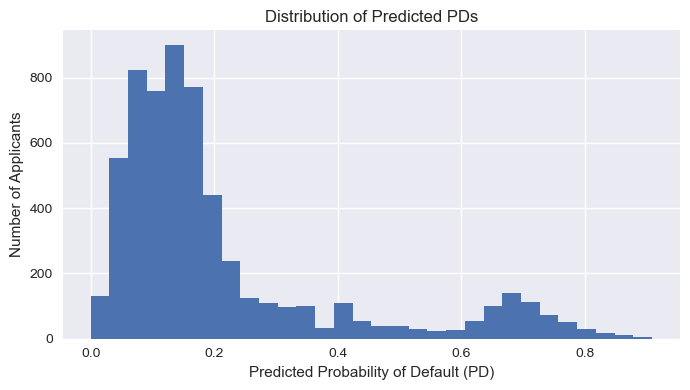

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load data and model
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

model = joblib.load("../artifacts/models/calibrator_tuned.joblib")


# Predict PDs
pd_test = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7,4))
plt.hist(pd_test, bins=30)
plt.xlabel("Predicted Probability of Default (PD)")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Predicted PDs")
plt.tight_layout()
plt.savefig("../artifacts/reports/figures/pd_distribution.png", dpi=200)
plt.show()


Visualization 2: Decision Distribution (Approve / Review / Reject)

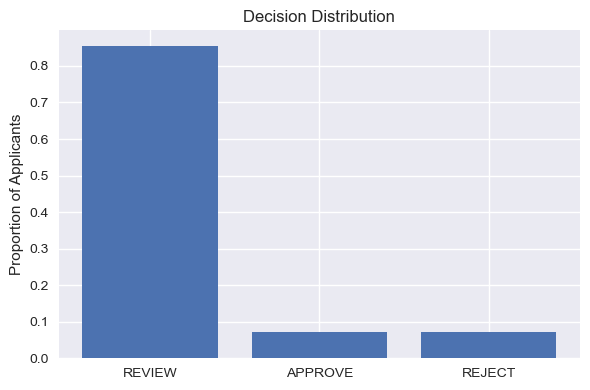

In [9]:
import numpy as np
import matplotlib.pyplot as plt

t_approve = 0.05
t_reject = 0.67

def decision(pd):
    if pd < t_approve:
        return "APPROVE"
    elif pd < t_reject:
        return "REVIEW"
    else:
        return "REJECT"

decisions = pd.Series([decision(p) for p in pd_test])
counts = decisions.value_counts(normalize=True)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.ylabel("Proportion of Applicants")
plt.title("Decision Distribution")
plt.tight_layout()
plt.savefig("../artifacts/reports/figures/decision_distribution.png", dpi=200)
plt.show()

Visualization 3: Calibration Curve

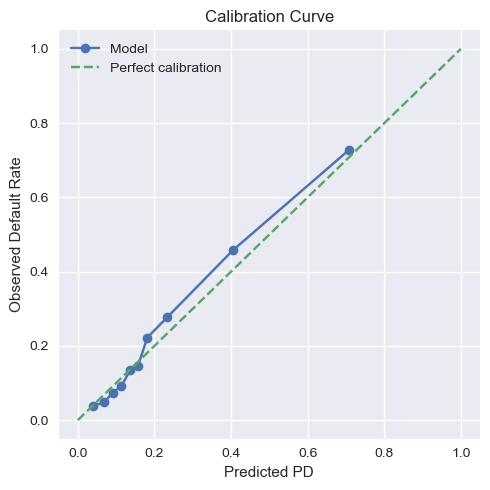

In [10]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(
    y_test, pd_test, n_bins=10, strategy="quantile"
)

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker="o", label="Model")
plt.plot([0,1], [0,1], linestyle="--", label="Perfect calibration")
plt.xlabel("Predicted PD")
plt.ylabel("Observed Default Rate")
plt.title("Calibration Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../artifacts/reports/figures/calibration_curve.png", dpi=200)
plt.show()

Visualization 4: Feature Importance

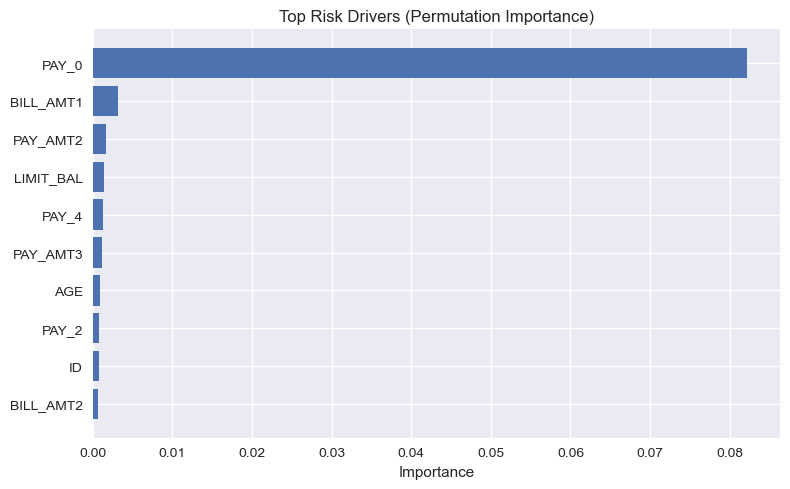

In [11]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)

importances = pd.DataFrame({
    "feature": X_test.columns,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(importances["feature"][::-1], importances["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top Risk Drivers (Permutation Importance)")
plt.tight_layout()
plt.savefig("../artifacts/reports/figures/feature_importance.png", dpi=200)
plt.show()